# Testing dataset loading

This notebook contains code that run the pipeline we have created to analyze a set of datasets.

In [1]:
# adding the project root inside the python path
import sys
import os

sys.path.insert(0, os.path.abspath('..'))

In [2]:
# The path where the dataset are stored
DATASET_PATH: str = "../../dataset/first_disease_sel/"
DISEASE_COLNAME: str = 'DISEASE'

In [3]:
from analysis.dataset import load_datasets, compute_ds_col_intersection, clean_datasets, build_dataset, scale_minmax

### Load datasets

In [4]:
# Load dataset
datasets = load_datasets(DATASET_PATH)
# compute intersection
colname_intersection = compute_ds_col_intersection(datasets)
# clean datasets
datasets = clean_datasets(datasets, colname_intersection)

INFO:root:Inspecting directory ../../dataset/first_disease_sel/A1A
INFO:root:Setting disease as A1A
INFO:root:Inspecting directory ../../dataset/first_disease_sel/GS
INFO:root:Setting disease as GS
INFO:root:Inspecting directory ../../dataset/first_disease_sel/NALD
INFO:root:Setting disease as NALD
INFO:root:Inspecting directory ../../dataset/first_disease_sel/DIABETE
INFO:root:Setting disease as DIABETE
INFO:root:Inspecting directory ../../dataset/first_disease_sel/MCM
INFO:root:Setting disease as MCM


## Scaling

In [5]:
datasets_normalized = scale_minmax(datasets)

## Building unique DS

In [8]:
# finally build the unique dataset
dataset = build_dataset(datasets_normalized)
dataset

,NDEL1,ECI1,MAGOHB,ZNF544,CDK5RAP1,FRMD4B,NSA2,ZNF432,MSX1,PRPF18,...,EIF5A2,MAP1B,ZNF562,TRAPPC8,TM9SF2,GIT2,GUF1,ARFIP1,RNF122,CCNL1
0,0.757103,0.092009,0.700633,0.553501,0.597572,0.494055,0.730134,0.356948,0.000000,0.553494,...,0.479091,0.373772,0.369567,0.324717,0.421443,0.791401,0.456586,0.459376,0.533959,0.452647
1,0.783183,0.112821,0.347437,0.346545,0.503784,0.750682,0.504079,0.271803,0.060420,0.658956,...,0.106295,0.529850,0.233007,0.278060,0.263327,0.813583,0.466259,0.301427,0.284337,0.346533
2,0.332500,0.032600,0.561744,0.408299,0.971435,0.729147,0.657743,0.417773,0.068623,0.793245,...,0.180713,0.448119,0.338193,0.309826,0.440362,0.388911,0.625816,0.117887,0.217627,0.706346
3,0.583981,0.142801,0.361130,0.504162,0.497240,0.370371,0.881842,0.353690,0.122991,0.460644,...,0.089573,0.170100,0.305760,0.311890,0.359783,0.655100,0.349756,0.283734,0.279161,0.308804
4,0.734106,0.230690,0.223578,0.453401,0.723171,0.864801,0.416166,0.347156,0.066062,0.274539,...,0.217993,0.131575,0.392823,0.334549,0.657294,0.580470,0.540589,0.494216,0.417879,0.426296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,0.254300,0.445194,0.254143,0.274244,0.538056,0.205603,0.982590,0.783734,0.696186,0.893993,...,0.242673,0.758073,0.549193,0.164542,0.465641,0.776924,0.259954,0.418256,0.661444,0.290052
24,0.142193,0.695293,0.338302,0.050386,0.697333,0.103624,0.438048,0.582836,0.490631,0.386639,...,0.293286,0.855470,0.738490,0.640944,0.731619,0.265424,0.283762,0.651809,0.565605,0.242364
25,0.377343,0.688660,0.387373,1.000000,0.670648,0.427563,0.577741,0.134261,0.633237,0.394740,...,0.474117,0.447150,0.665254,0.617077,0.600444,0.269128,0.650495,0.663115,0.765104,0.625440
26,0.031471,0.291594,0.573994,0.197667,0.593270,0.000000,0.729502,0.565036,0.425340,0.953135,...,0.122289,0.521904,0.953243,0.005398,0.634286,0.217401,0.157385,0.743802,0.530296,0.133622


## Inspecting dataset we have built

DIABETE    176
A1A        128
NALD        38
GS          29
MCM         28
Name: DISEASE, dtype: int64


<AxesSubplot:>

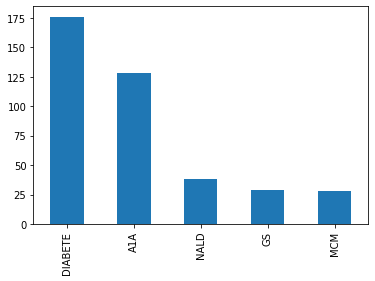

In [7]:
# plotting the number of sample for each disease
disease = dataset.DISEASE.value_counts()
print(disease)
disease.plot.bar()